In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline

# Exercise 2.8

In [2]:
# Read the data 

df = pd.read_csv('Datasets/College.csv', index_col=0)

In [3]:
# Look at the head of the data 
# df.tail(n) and df.sample(n) are also available 

df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# summary of the data 

df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


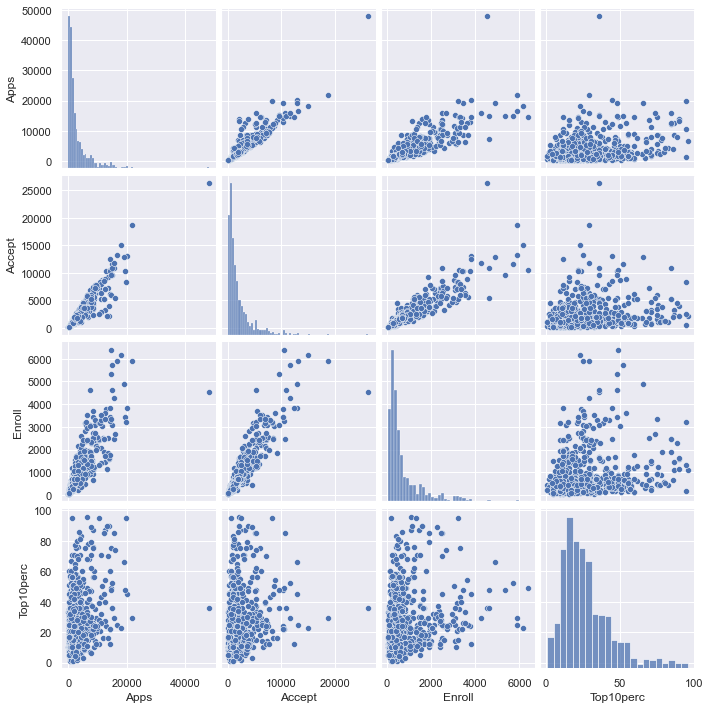

In [5]:
# Pairplot for first 5 columns 

sns.pairplot(df.iloc[:, :5])
plt.show()

In [19]:
# Create a new variable 'Elite'

new_var = np.where(df['Top10perc'] > 50, 'Yes', 'No')
df['Elite'] = pd.Categorical(new_var)
df['Elite']

Abilene Christian University       No
Adelphi University                 No
Adrian College                     No
Agnes Scott College               Yes
Alaska Pacific University          No
                                 ... 
Worcester State College            No
Xavier University                  No
Xavier University of Louisiana     No
Yale University                   Yes
York College of Pennsylvania       No
Name: Elite, Length: 777, dtype: category
Categories (2, object): ['No', 'Yes']

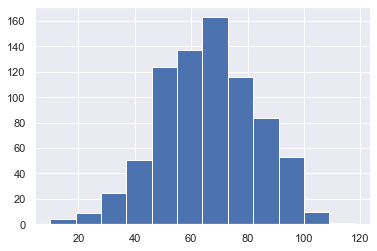

In [26]:
# Make hist 

plt.hist(df['Grad.Rate'], bins=12)
plt.show()

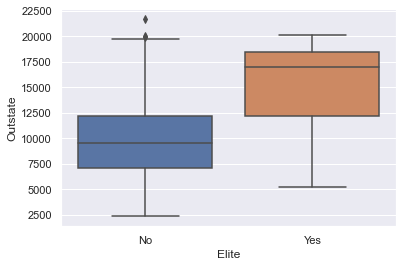

In [28]:
# Further explore 

sns.boxplot(x='Elite', y='Outstate', data = df)
plt.show()

# Exercise 6.9

In [176]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
# Extracting X and y 

y = df['Apps']
X = df.drop(['Apps', 'Elite'], axis=1)

# Dummy coding categorical 

X = pd.get_dummies(X)

In [142]:
# Training and test set split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [166]:
# Test error in training set with regression 

lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training set R2: \t\t', lr.score(X_train, y_train))

y_pred = lr.predict(X_test)
print('Testing set R2: \t\t', r2_score(y_test, y_pred))

Training set R2: 		 0.9343819261671406
Testing set R2: 		 0.9065046264368404


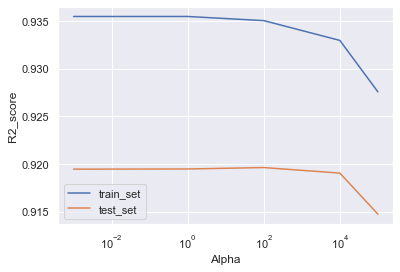

In [161]:
# Test error with Ridge 

ridge = Ridge()

alphas = [100000, 10000, 100, 1, 0.001]

train_scores, test_scores = validation_curve(Ridge(), 
                                             X_train, y_train, 
                                             param_name='alpha', 
                                             param_range=alphas, 
                                             scoring='r2',
                                             cv=5)

plt.plot(alphas, np.mean(train_scores, axis=1))
plt.plot(alphas, np.mean(test_scores, axis=1))
plt.xlabel('Alpha')
plt.ylabel('R2_score')
plt.legend(['train_set', 'test_set'])
plt.xscale('log')
plt.show()

In [172]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

print('Training set R2: \t\t', ridge.score(X_train, y_train))

y_pred_ridge = ridge.predict(X_test)
print('Testing set R2: \t\t', r2_score(y_test, y_pred_ridge))

Training set R2: 		 0.9343817683662142
Testing set R2: 		 0.9065082928247664


In [194]:
# Lasso 

alpha_list = np.geomspace(0.000001, 10000, num=20)
lasso = LassoCV(alphas = alpha_list, max_iter = 20000)
lasso.fit(X_train, y_train)

print('Training set R2: \t\t', lasso.score(X_train, y_train))

y_pred_lasso = lasso.predict(X_test)
print('Testing set R2: \t\t', r2_score(y_test, y_pred_lasso))

Training set R2: 		 0.934339136717478
Testing set R2: 		 0.9065518275540233


In [ ]:
# Principal Component Analysis (PCA) regression 



In [ ]:
# Partial Least Square (PCL) regression 



# Exercise 7.10